In [7]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.python.keras  import utils
from keras.utils import to_categorical
from sklearn.utils import class_weight, resample
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from scipy import stats
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import metrics

In [2]:
#ecg_df=pd.read_csv(r"C:\Users\USER\Desktop\csvdataecgmitbih\MIT-BIH Arrhythmia Database.csv")

In [53]:
import sagemaker
from sagemaker import get_execution_role
import pandas as pd

sagemaker_session = sagemaker.Session()
role = get_execution_role()

s3_uri = 's3://psutgrad/MIT-BIH Arrhythmia Database.csv'

# Download the data to SageMaker instance
sagemaker_session.download_data(path='local/path', bucket='psutgrad', key_prefix='MIT-BIH Arrhythmia Database.csv')

ecg_df= pd.read_csv('local/path/MIT-BIH Arrhythmia Database.csv')



In [31]:
ecg_df

,record,type,0_pre-RR,0_post-RR,0_pPeak,0_tPeak,0_rPeak,0_sPeak,0_qPeak,0_qrs_interval,...,1_qPeak,1_qrs_interval,1_pq_interval,1_qt_interval,1_st_interval,1_qrs_morph0,1_qrs_morph1,1_qrs_morph2,1_qrs_morph3,1_qrs_morph4
0,101,N,76,313.0,0.074347,-0.160548,1.036401,-0.285662,-0.026824,41,...,0.025930,2,18,22,2,0.025930,0.025930,0.025930,0.025436,0.025436
1,101,N,313,315.0,-0.052079,-0.264784,0.886597,-0.366298,-0.059710,21,...,-0.042009,26,27,62,9,-0.042009,-0.029498,0.005012,0.030892,0.002986
2,101,N,315,321.0,-0.062151,-0.296983,0.991859,-0.410306,-0.065686,22,...,0.009528,3,8,12,1,0.009528,0.009528,0.008786,0.008786,0.008368
3,101,N,321,336.0,-0.063322,-0.281386,1.034903,-0.403880,-0.071750,22,...,-0.020536,6,9,16,1,-0.020536,-0.020257,-0.018965,-0.016968,-0.014555
4,101,N,336,344.0,-0.062915,1.046914,1.046408,1.046408,-0.074639,11,...,0.016053,16,5,31,10,0.016053,0.006742,0.002782,-0.007798,-0.051155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100684,234,N,240,241.0,-0.110230,1.420339,1.403346,1.403346,-0.115682,14,...,-0.069234,5,6,20,9,-0.069234,-0.068378,-0.065373,-0.060779,-0.054383
100685,234,N,241,243.0,-0.119014,1.424782,1.420328,1.420328,-0.134406,13,...,-0.069530,7,5,20,8,-0.069530,-0.069290,-0.066317,-0.053437,-0.045120
100686,234,N,243,252.0,0.173524,-0.443214,1.436878,-0.714642,-0.136431,38,...,-0.089396,9,7,24,8,-0.089396,-0.088155,-0.078611,-0.066763,-0.058650
100687,234,N,252,244.0,-0.119820,-0.401522,1.337051,-0.688560,-0.125076,27,...,-0.065487,3,1,12,8,-0.065487,-0.065487,-0.064941,-0.064941,-0.061120


              record       0_pre-RR      0_post-RR        0_pPeak  \
count  100689.000000  100689.000000  100689.000000  100689.000000   
mean      173.730984     279.400947     278.588207       0.049772   
std        51.673158      81.915453      81.124963       0.168789   
min       100.000000      11.000000       6.000000      -3.094391   
25%       115.000000     230.000000     230.000000      -0.054749   
50%       203.000000     267.000000     266.000000       0.015865   
75%       219.000000     324.000000     322.000000       0.125809   
max       234.000000    2114.000000    2114.000000       3.821118   

             0_tPeak        0_rPeak        0_sPeak        0_qPeak  \
count  100689.000000  100689.000000  100689.000000  100689.000000   
mean        0.372262       1.054485      -0.134376      -0.090466   
std         0.739879       0.617508       1.027590       0.189436   
min        -2.006422      -2.372835      -3.622550      -3.871359   
25%        -0.249060       0.7540

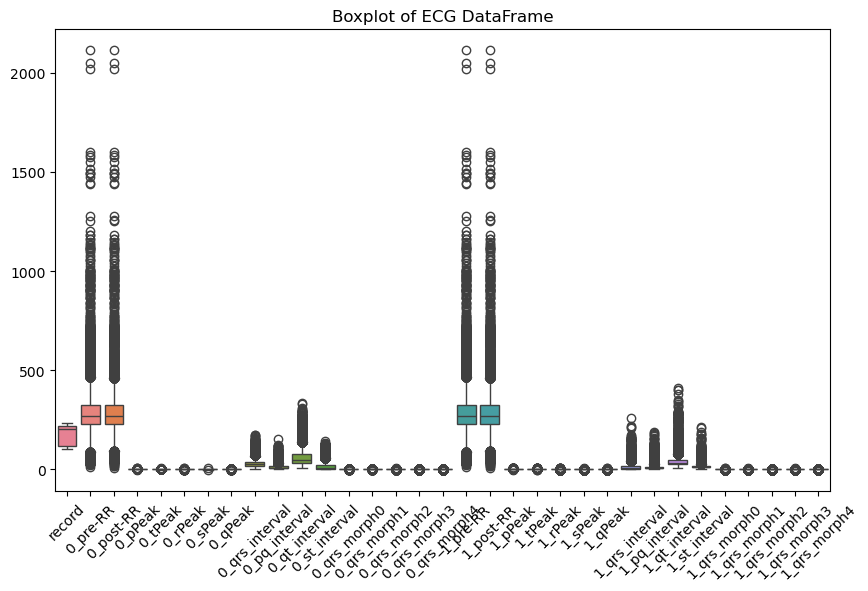

Number of  Rows with outliers:
record            46243
type              46243
0_pre-RR          46243
0_post-RR         46243
0_pPeak           46243
0_tPeak           46243
0_rPeak           46243
0_sPeak           46243
0_qPeak           46243
0_qrs_interval    46243
0_pq_interval     46243
0_qt_interval     46243
0_st_interval     46243
0_qrs_morph0      46243
0_qrs_morph1      46243
0_qrs_morph2      46243
0_qrs_morph3      46243
0_qrs_morph4      46243
1_pre-RR          46243
1_post-RR         46243
1_pPeak           46243
1_tPeak           46243
1_rPeak           46243
1_sPeak           46243
1_qPeak           46243
1_qrs_interval    46243
1_pq_interval     46243
1_qt_interval     46243
1_st_interval     46243
1_qrs_morph0      46243
1_qrs_morph1      46243
1_qrs_morph2      46243
1_qrs_morph3      46243
1_qrs_morph4      46243
dtype: int64


In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'ecg_df' is your DataFrame

# Select numerical columns for summary statistics
numerical_cols = ecg_df.select_dtypes(include=['number']).columns
summary_stats = ecg_df[numerical_cols].describe()
print(summary_stats)

# Box plot to visualize outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=ecg_df[numerical_cols])
plt.title("Boxplot of ECG DataFrame")
plt.xticks(rotation=45)  # Adjust the rotation angle as needed
plt.show()

# Identify and print rows with outliers using the IQR method
Q1 = ecg_df[numerical_cols].quantile(0.25)
Q3 = ecg_df[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

outliers = ((ecg_df[numerical_cols] < (Q1 - 1.5 * IQR)) | (ecg_df[numerical_cols] > (Q3 + 1.5 * IQR))).any(axis=1)
outlier_rows = ecg_df[outliers]
print("Number of  Rows with outliers:")
print(outlier_rows.count())


In [2]:
from tensorflow.keras import Sequential,utils
from tensorflow.keras.layers import Flatten, Dense, Conv1D, MaxPool1D, Dropout

In [54]:
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.preprocessing import RobustScaler

# Define or load your DataFrame 'ecg_df'

# Check the data types of the columns
print(ecg_df.info())

# Select numerical columns
numerical_columns = ecg_df.select_dtypes(include=np.number).columns

# Ensure there are no missing values
ecg_df.dropna(subset=numerical_columns, inplace=True)

# Initialize the RobustScaler
robust_scaler = RobustScaler()

# Fit and transform the selected columns
ecg_df[numerical_columns] = robust_scaler.fit_transform(ecg_df[numerical_columns])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100689 entries, 0 to 100688
Data columns (total 34 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   record          100689 non-null  int64  
 1   type            100689 non-null  object 
 2   0_pre-RR        100689 non-null  int64  
 3   0_post-RR       100689 non-null  float64
 4   0_pPeak         100689 non-null  float64
 5   0_tPeak         100689 non-null  float64
 6   0_rPeak         100689 non-null  float64
 7   0_sPeak         100689 non-null  float64
 8   0_qPeak         100689 non-null  float64
 9   0_qrs_interval  100689 non-null  int64  
 10  0_pq_interval   100689 non-null  int64  
 11  0_qt_interval   100689 non-null  int64  
 12  0_st_interval   100689 non-null  int64  
 13  0_qrs_morph0    100689 non-null  float64
 14  0_qrs_morph1    100689 non-null  float64
 15  0_qrs_morph2    100689 non-null  float64
 16  0_qrs_morph3    100689 non-null  float64
 17  0_qrs_morp

In [5]:
counter=0
for index, row in ecg_df.iterrows():
    for col in ecg_df.columns:
        if pd.isnull(row[col]):
            counter=counter+1
            print(f"Missing value in row {index}, column {col}")
if(counter==0):
    print("No missing values found")

No missing values found


In [55]:
mask = ecg_df['type'] =='Q'
ecg_df=ecg_df[~mask]

In [5]:
ecg_df['type'].value_counts()

N       90083
VEB      7009
SVEB     2779
F         803
Name: type, dtype: int64

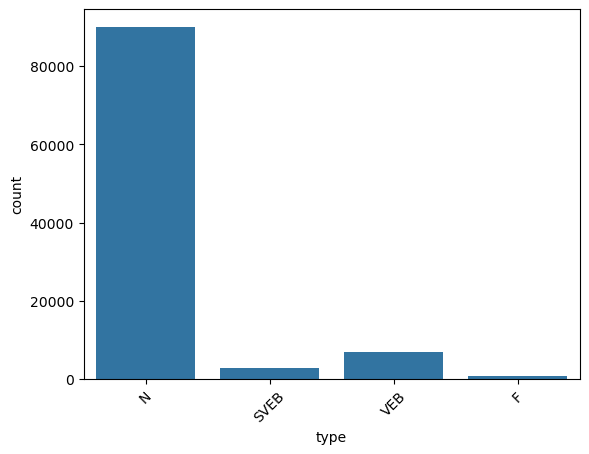

In [8]:
sns.countplot(x='type', data = ecg_df)
plt.xticks(rotation=45)
plt.show()

In [56]:
n_rows = ecg_df[ecg_df['type'] == 'N']

rows_to_keep = int(len(n_rows) * 0.20)

n_rows = n_rows.sample(n=rows_to_keep, random_state=42)

ecg_df = ecg_df[ecg_df['type'] != 'N']

ecg_df = pd.concat([ecg_df, n_rows])


In [10]:
ecg_df['type'].value_counts()

N       18016
VEB      7009
SVEB     2779
F         803
Name: type, dtype: int64

In [13]:
print(ecg_df.columns)

Index(['record', 'type', '0_pre-RR', '0_post-RR', '0_pPeak', '0_tPeak',
       '0_rPeak', '0_sPeak', '0_qPeak', '0_qrs_interval', '0_pq_interval',
       '0_qt_interval', '0_st_interval', '0_qrs_morph0', '0_qrs_morph1',
       '0_qrs_morph2', '0_qrs_morph3', '0_qrs_morph4', '1_pre-RR', '1_post-RR',
       '1_pPeak', '1_tPeak', '1_rPeak', '1_sPeak', '1_qPeak', '1_qrs_interval',
       '1_pq_interval', '1_qt_interval', '1_st_interval', '1_qrs_morph0',
       '1_qrs_morph1', '1_qrs_morph2', '1_qrs_morph3', '1_qrs_morph4'],
      dtype='object')


In [57]:
ecg_df= ecg_df.drop(columns=['record'])

In [23]:
print(ecg_df.columns)

Index(['type', '0_pre-RR', '0_post-RR', '0_pPeak', '0_tPeak', '0_rPeak',
       '0_sPeak', '0_qPeak', '0_qrs_interval', '0_pq_interval',
       '0_qt_interval', '0_st_interval', '0_qrs_morph0', '0_qrs_morph1',
       '0_qrs_morph2', '0_qrs_morph3', '0_qrs_morph4', '1_pre-RR', '1_post-RR',
       '1_pPeak', '1_tPeak', '1_rPeak', '1_sPeak', '1_qPeak', '1_qrs_interval',
       '1_pq_interval', '1_qt_interval', '1_st_interval', '1_qrs_morph0',
       '1_qrs_morph1', '1_qrs_morph2', '1_qrs_morph3', '1_qrs_morph4'],
      dtype='object')


In [ ]:
#Feauture Selection

In [15]:
from sklearn.preprocessing import LabelEncoder
X = ecg_df.drop('type', axis=1)
y = ecg_df['type']
lb= LabelEncoder()
y=lb.fit_transform(y)

In [ ]:
#Technique 1 / Chi Square / Didn't work due to negative values 

In [ ]:
#Technique 2 / SelectKbest

In [36]:
from sklearn.feature_selection import SelectKBest, f_classif
selector = SelectKBest(f_classif, k=10)
selector.fit(X, y)
selected_indices = selector.get_support(indices=True)
if len(selected_indices) > 0:
    selected_features = X.columns[selected_indices]
    print(selected_features)

Index(['0_pre-RR', '0_pPeak', '0_rPeak', '0_sPeak', '0_qt_interval',
       '1_pre-RR', '1_qPeak', '1_qt_interval', '1_qrs_morph0', '1_qrs_morph1'],
      dtype='object')


In [ ]:
#Technique 3 / L1

In [58]:
import pandas as pd
from sklearn.linear_model import Lasso

# Assuming df is your dataframe and 'target' is your target column

# Separate features and target


# Create and fit the Lasso model
# alpha is the regularization parameter, you might need to tune this
lasso = Lasso(alpha=0.01)  # Example value for alpha
lasso.fit(X, y)

# Extract the coefficients
coefficients = lasso.coef_

# Create a DataFrame to view the coefficients of the features
features_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': coefficients})
print(features_df.sort_values(by="Coefficient", key=abs, ascending=False))

# Features with a coefficient of 0 can be considered for exclusion


           Feature  Coefficient
0         0_pre-RR    -0.371790
3          0_tPeak     0.289816
5          0_sPeak    -0.287185
7   0_qrs_interval     0.221454
4          0_rPeak    -0.208659
1        0_post-RR     0.192606
25   1_qt_interval     0.121814
29    1_qrs_morph2     0.113875
19         1_tPeak     0.110198
2          0_pPeak     0.092433
10   0_st_interval    -0.039183
18         1_pPeak    -0.011982
15    0_qrs_morph4    -0.011642
21         1_sPeak     0.008392
26   1_st_interval     0.007156
6          0_qPeak     0.003031
24   1_pq_interval     0.002614
17       1_post-RR     0.000429
11    0_qrs_morph0     0.000276
16        1_pre-RR    -0.000024
9    0_qt_interval     0.000000
13    0_qrs_morph2     0.000000
12    0_qrs_morph1     0.000000
8    0_pq_interval     0.000000
14    0_qrs_morph3    -0.000000
23  1_qrs_interval     0.000000
20         1_rPeak    -0.000000
22         1_qPeak     0.000000
27    1_qrs_morph0     0.000000
28    1_qrs_morph1     0.000000
30    1_

In [59]:
selected = [
    "0_pre-RR", "0_tPeak", "0_sPeak", "0_qrs_interval", "0_rPeak", "0_post-RR",
    "1_qt_interval", "1_qrs_morph2", "1_tPeak", "0_pPeak", "0_st_interval",
    "1_pPeak", "0_qrs_morph4", "1_sPeak", "1_st_interval", "0_qPeak",
    "1_pq_interval", "1_post-RR", "0_qrs_morph0", "1_pre-RR", "type"
]
ecg_df=ecg_df.loc[:, selected]

In [60]:
ecg_df

,0_pre-RR,0_tPeak,0_sPeak,0_qrs_interval,0_rPeak,0_post-RR,1_qt_interval,1_qrs_morph2,1_tPeak,0_pPeak,...,1_pPeak,0_qrs_morph4,1_sPeak,1_st_interval,0_qPeak,1_pq_interval,1_post-RR,0_qrs_morph0,1_pre-RR,type
420,-0.776596,-0.469011,0.119755,-0.20,0.266343,1.739130,-1.15,0.246259,-0.580402,-0.441555,...,-0.070333,-0.367825,0.582405,-1.285714,-0.243794,-0.500,1.739130,-0.243794,-0.776596,SVEB
644,0.702128,-0.502416,0.070290,-0.20,0.284297,1.608696,-0.30,0.292204,-0.549547,0.110813,...,0.134613,-0.522039,0.524733,-0.571429,0.609247,-0.625,1.608696,0.609247,0.702128,SVEB
1537,-0.319149,-0.461914,0.117490,-0.25,0.373583,2.097826,0.55,0.263904,-0.570722,-0.117868,...,-0.228415,-0.418460,0.544206,-0.857143,-0.301272,-0.375,2.097826,-0.301272,-0.319149,SVEB
1966,-0.712766,0.099841,-0.547229,2.10,-0.064934,-0.956522,0.75,0.339528,0.579859,-2.296417,...,-0.010715,1.220001,-0.968909,0.142857,-2.806294,0.375,-0.956522,-2.806294,-0.712766,VEB
1967,-0.946809,0.458494,-0.526348,1.55,-0.242240,1.793478,-0.30,-0.489053,-0.800785,4.175346,...,-1.881201,0.146663,0.024075,-0.857143,-4.129635,1.000,1.793478,-4.129635,-0.946809,VEB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13067,1.329787,1.280234,1.346699,0.10,0.874214,1.369565,-0.60,-0.272643,-0.370760,-0.395716,...,0.005716,0.136052,0.043848,-0.142857,0.026439,0.125,1.369565,0.026439,1.329787,N
13250,0.478723,1.195096,1.225794,0.20,0.578480,0.380435,-0.70,-0.194820,-0.246951,-0.114855,...,0.238309,-0.154130,0.084014,-0.428571,0.449100,-0.125,0.380435,0.449100,0.478723,N
71857,-0.478723,-0.066806,-0.009617,0.55,-0.235514,-0.532609,-0.20,-0.079889,-0.378421,-0.159711,...,-0.069080,-0.031563,0.129175,0.285714,0.416552,0.000,-0.532609,0.416552,-0.478723,N
62652,1.755319,-0.242726,-0.094958,0.20,-0.730680,1.750000,0.10,1.084726,-1.065470,-0.579410,...,-1.137974,0.119606,-0.314893,-0.571429,-0.341671,-0.625,1.750000,-0.341671,1.755319,N


In [61]:
X = ecg_df.drop('type', axis=1)
y = ecg_df['type']
lb=LabelEncoder()
y=lb.fit_transform(y)

In [62]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [63]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [20]:
pip install -U imbalanced-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.6/235.6 kB 5.1 MB/s eta 0:00:00:00:01
Note: you may need to restart the kernel to use updated packages.


In [48]:
from imblearn.over_sampling import SMOTE
import numpy as np
import pandas as pd
smote = SMOTE()
x_train2, y_train2 = smote.fit_resample(x_train, y_train)
print("Before SMOTE:")
print(pd.Series(y_train).value_counts())
print("After SMOTE:")
print(pd.Series(y_train2).value_counts())

Before SMOTE:
1    11541
3     4492
2     1758
0      517
dtype: int64
After SMOTE:
0    11541
2    11541
1    11541
3    11541
dtype: int64


In [64]:
x_train

,0_pre-RR,0_tPeak,0_sPeak,0_qrs_interval,0_rPeak,0_post-RR,1_qt_interval,1_qrs_morph2,1_tPeak,0_pPeak,0_st_interval,1_pPeak,0_qrs_morph4,1_sPeak,1_st_interval,0_qPeak,1_pq_interval,1_post-RR,0_qrs_morph0,1_pre-RR
36839,-0.712766,0.835271,1.001325,-0.05,0.029430,-0.282609,0.30,-0.634219,0.631504,1.228926,-0.136364,-0.395968,1.002218,-0.288347,1.571429,0.767654,0.750,-0.282609,0.767654,-0.712766
99266,-1.063830,0.813033,1.035966,-0.75,0.114163,-0.902174,-0.35,0.163755,0.595221,0.418602,-0.318182,1.101444,0.840305,0.513805,-0.428571,1.039216,1.000,-0.902174,1.039216,-1.063830
94485,-0.085106,0.290150,0.654037,0.05,-0.820034,-0.086957,-0.10,0.294946,0.119270,0.159760,-0.318182,-0.199016,-0.161336,0.016988,-0.142857,0.843977,-0.625,-0.086957,0.843977,-0.085106
23177,0.063830,-0.725571,-0.140574,0.10,0.503729,0.130435,-0.15,0.602578,-0.592489,-0.743316,-0.090909,-0.226172,-0.300422,0.534748,-1.142857,-1.418011,-0.375,0.130435,-1.418011,0.063830
87427,0.680851,-0.248752,0.188623,-0.40,-1.026374,0.315217,-0.55,-0.711306,0.216130,-0.177981,0.000000,0.848163,-0.468275,-0.592732,-0.142857,0.426796,-0.125,0.315217,0.426796,0.680851
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
940,0.851064,-0.511113,0.090866,-0.15,0.061411,1.086957,-0.65,0.201099,-0.497784,-0.444184,-0.227273,-0.126458,-0.579373,0.445210,-0.428571,-0.252871,-0.625,1.086957,-0.252871,0.851064
28850,-1.414894,0.289274,-0.590404,-1.15,-3.447972,-1.478261,0.90,0.576937,0.099073,-0.723033,1.000000,1.106110,-2.668780,-0.990623,2.142857,-9.573351,-0.500,-1.478261,-9.573351,-1.414894
72605,-0.393617,-0.564665,-0.025543,0.10,-0.272471,0.315217,-0.20,-0.046995,-0.359093,-0.002339,0.045455,-0.592525,-0.502800,0.181050,0.285714,0.606715,0.000,0.315217,0.606715,-0.393617
58532,0.308511,0.016680,-0.067010,-0.20,-0.654264,0.543478,1.05,-0.499119,0.296211,2.487288,3.272727,0.387478,-1.045865,0.261181,1.428571,3.219231,2.000,0.543478,3.219231,0.308511


In [65]:
y_train

array([0, 2, 2, ..., 1, 1, 1])

In [24]:
from tensorflow.keras import Sequential,utils
from tensorflow.keras.layers import Flatten, Dense, Conv1D, MaxPool1D, Dropout
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, GRU

In [26]:
os.environ['CUDA_VISIBLE_DEVICES'] = "0"

In [70]:
model = Sequential()

model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=(x_train.shape[1], 1)))
model.add(Conv1D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(Conv1D(filters=128, kernel_size=5, padding='same', activation='relu'))

model.add(MaxPooling1D(pool_size=3, strides=2, padding='same'))
model.add(Dropout(0.2))

model.add(Conv1D(filters=256, kernel_size=3, padding='same', activation='relu'))
model.add(Conv1D(filters=512, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=3, strides=2, padding='same'))
model.add(Dropout(0.2))

gru_units = 128 
model.add(GRU(gru_units))

model.add(Dense(units=512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=1024, activation='relu'))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(units=4, activation='softmax'))


In [71]:
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [72]:
from tensorflow.keras.callbacks import EarlyStopping

# Define the EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Use the EarlyStopping callback in the fit method
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=30, callbacks=[early_stopping])


Epoch 1/30
573/573 [==============================] - 21s 32ms/step - loss: 0.4238 - accuracy: 0.8591 - val_loss: 0.2648 - val_accuracy: 0.9054
Epoch 2/30
573/573 [==============================] - 18s 32ms/step - loss: 0.2288 - accuracy: 0.9253 - val_loss: 0.1997 - val_accuracy: 0.9393
Epoch 3/30
573/573 [==============================] - 18s 32ms/step - loss: 0.1793 - accuracy: 0.9428 - val_loss: 0.1531 - val_accuracy: 0.9517
Epoch 4/30
573/573 [==============================] - 18s 32ms/step - loss: 0.1536 - accuracy: 0.9532 - val_loss: 0.2027 - val_accuracy: 0.9349
Epoch 5/30
573/573 [==============================] - 18s 32ms/step - loss: 0.1398 - accuracy: 0.9561 - val_loss: 0.1230 - val_accuracy: 0.9624
Epoch 6/30
573/573 [==============================] - 18s 32ms/step - loss: 0.1175 - accuracy: 0.9631 - val_loss: 0.1167 - val_accuracy: 0.9622
Epoch 7/30
573/573 [==============================] - 18s 32ms/step - loss: 0.1089 - accuracy: 0.9662 - val_loss: 0.1291 - val_accuracy:

In [73]:
model.save("ecggrad.h5")

/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [74]:
results = model.evaluate(x_test, y_test)
print("Test Loss:", results[0])
print("Test Metrics:", results[1:])

179/179 [==============================] - 1s 5ms/step - loss: 0.1242 - accuracy: 0.9610
Test Loss: 0.12415761500597
Test Metrics: [0.9610276222229004]


Text(0.5, 0, 'epoch')

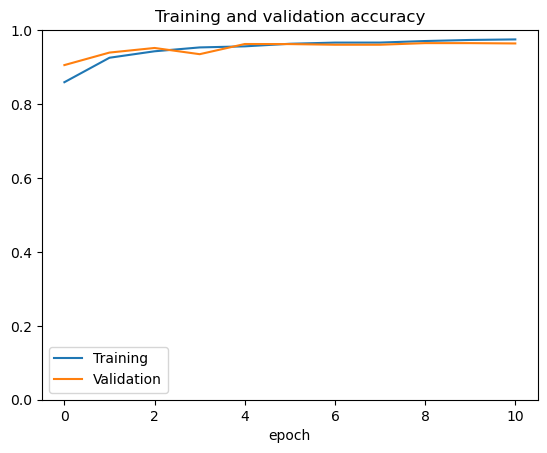

In [75]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylim(0,1)
plt.legend(['Training', 'Validation'])
plt.title("Training and validation accuracy")
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

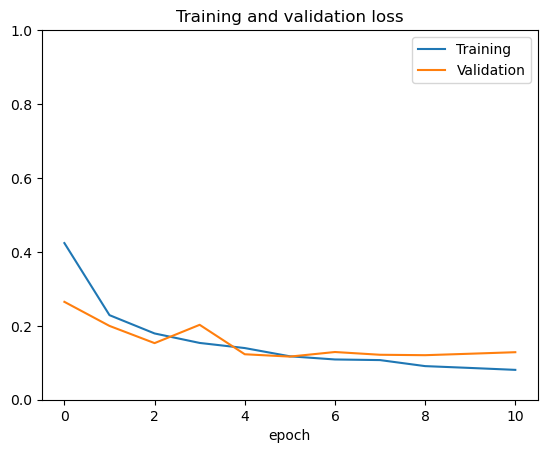

In [76]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylim(0,1)
plt.legend(['Training', 'Validation'])
plt.title("Training and validation loss")
plt.xlabel('epoch')

In [77]:
from sklearn.metrics import precision_recall_fscore_support

# Assuming y_val is your true labels and y_pred_classes is your predicted labels
y_pred = model.predict(x_val)

# Convert predictions to class labels
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculate precision, recall, and f1 score
precision, recall, f1_score, _ = precision_recall_fscore_support(y_val, y_pred_classes, average='weighted')

# Print recall and f1 score
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1_score:.4f}')
print(f'Precision: {precision:.4f}')


144/144 [==============================] - 1s 5ms/step
Recall: 0.9622
F1 Score: 0.9621
Precision: 0.9624


In [36]:
from tensorflow.keras.models import load_model


In [41]:
pip install plotdigitizer

Note: you may need to restart the kernel to use updated packages.


In [79]:
import pandas as pd
from sagemaker import Predictor
from sagemaker.serializers import CSVSerializer
import subprocess
import os
import pandas as pd
from sklearn.preprocessing import RobustScaler
def run_plotdigitizer(image_path):
    command = f'plotdigitizer "{image_path}" -p 0,0 -p 2,0 -p 0,1 -l 2,29 -l 4,5 -l 22,5'

    output = subprocess.run(command, shell=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE, text=True)

    image_path2 = os.path.splitext(image_path)[0] + ".png.traj.csv"

    df = pd.read_csv(image_path2, sep=' ', header=None)
    scaler = RobustScaler()
    df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
    df = df.iloc[:, 1:2]

    df = df.head(10).T.reset_index(drop=True)

    df.columns = ['0_pre-RR', '0_pPeak', '0_rPeak', '0_sPeak', '0_qt_interval',
                  '1_pre-RR', '1_qPeak', '1_qt_interval', '1_qrs_morph0', '1_qrs_morph1']

    df = df.apply(pd.to_numeric, errors='coerce')

    predictions = model.predict(df)
    predicted_label_index = np.argmax(predictions)

    class_labels = ["N", "VEB", "SVEB", "Fusion"]

    predicted_label = class_labels[predicted_label_index]

    print(f"The predicted label is: {predicted_label}")


run_plotdigitizer("/home/ec2-user/SageMaker/ST-elevation-1024x387.png")

1/1 [==============================] - 0s 15ms/step
The predicted label is: VEB
